In [2]:
pip install pandas numpy openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [6]:
df = pd.read_csv("C:\\Users\\anvim\\Desktop\\PYTHON ASS\\machine learning\\house_price.csv")
print(df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    mean = df[column].mean()
    std = df[column].std()
    
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in total_sqft:
                     location       size  total_sqft  bath   price  bhk  \
61                 Whitefield  4 Bedroom      5700.0   5.0   650.0    4   
120                    Hebbal      4 BHK      5611.5   4.0   477.0    4   
404              Rajaji Nagar      7 BHK     12000.0   6.0  2200.0    7   
435                Whitefield  4 Bedroom     11890.0   4.0   700.0    4   
509    Banashankari Stage III  4 Bedroom      8500.0   4.0   145.0    4   
...                       ...        ...         ...   ...     ...  ...   
12976                   other      4 BHK      6652.0   6.0   660.0    4   
13000                   other  4 Bedroom      6688.0   6.0   700.0    4   
13078                   other  4 Bedroom      9200.0   4.0  2600.0    4   
13081                   other  6 Bedroom      8000.0   6.0  2800.0    6   
13107   Raja Rajeshwari Nagar  8 Bedroom      6000.0   8.0   215.0    8   

       price_per_sqft  
61              11403  
120              8500  
404

In [9]:
# Calculate the mean and standard deviation
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define the threshold for outliers (3 standard deviations from the mean)
lower_bound = mean_price - 3 * std_price
upper_bound = mean_price + 3 * std_price

# Find the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display the outliers
print(outliers)

                 location       size  total_sqft  bath   price  bhk  \
7            Rajaji Nagar      4 BHK     3300.00   4.0   600.0    4   
61             Whitefield  4 Bedroom     5700.00   5.0   650.0    4   
157    Mahalakshmi Layout  4 Bedroom     3750.00   4.0   760.0    4   
404          Rajaji Nagar      7 BHK    12000.00   6.0  2200.0    7   
435            Whitefield  4 Bedroom    11890.00   4.0   700.0    4   
...                   ...        ...         ...   ...     ...  ...   
12967               other      5 BHK     5665.84   7.0   988.0    5   
12976               other      4 BHK     6652.00   6.0   660.0    4   
13000               other  4 Bedroom     6688.00   6.0   700.0    4   
13078               other  4 Bedroom     9200.00   4.0  2600.0    4   
13081               other  6 Bedroom     8000.00   6.0  2800.0    6   

       price_per_sqft  
7               18181  
61              11403  
157             20266  
404             18333  
435              5887  
...

In [10]:
# Calculate the 1st and 99th percentiles
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

# Filter out the outliers
outliers = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]

# Display the outliers
print(outliers)

              location       size  total_sqft  bath   price  bhk  \
9                other  6 Bedroom      1020.0   6.0   370.0    6   
20             Kengeri      1 BHK       600.0   1.0    15.0    1   
45          HSR Layout  8 Bedroom       600.0   9.0   200.0    8   
130    Electronic City      2 BHK       880.0   1.0    16.5    2   
169           Attibele      1 BHK       450.0   1.0    11.0    1   
...                ...        ...         ...   ...     ...  ...   
13081            other  6 Bedroom      8000.0   6.0  2800.0    6   
13094            other  4 Bedroom      1200.0   5.0   325.0    4   
13127            other  4 Bedroom      1200.0   5.0   325.0    4   
13185         Hulimavu      1 BHK       500.0   1.0   220.0    1   
13186            other  4 Bedroom      1200.0   5.0   325.0    4   

       price_per_sqft  
9               36274  
20               2500  
45              33333  
130              1875  
169              2444  
...               ...  
13081          

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['total_sqft'] < lower_bound) | (df['total_sqft'] > upper_bound)]

# Display the outliers
print(outliers)

               location       size  total_sqft  bath  price  bhk  \
1      Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.0    4   
6      Old Airport Road      4 BHK      2732.0   4.0  204.0    4   
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
11           Whitefield  4 Bedroom      2785.0   5.0  295.0    4   
18                other      3 BHK      2770.0   4.0  290.0    3   
...                 ...        ...         ...   ...    ...  ...   
13170    Sarjapur  Road      4 BHK      4050.0   2.0  450.0    4   
13179        Whitefield      4 BHK      2856.0   5.0  154.5    4   
13195        Whitefield  5 Bedroom      3453.0   4.0  231.0    5   
13196             other      4 BHK      3600.0   5.0  400.0    4   
13198   Padmanabhanagar      4 BHK      4689.0   4.0  488.0    4   

       price_per_sqft  
1                4615  
6                7467  
7               18181  
11              10592  
18              10469  
...               ...  
13170          

In [12]:
import numpy as np

# Calculate the mean and standard deviation for the price column
mean_price = df['price'].mean()
std_price = df['price'].std()

# Calculate the Z-score for each value in the price column
df['z_score'] = (df['price'] - mean_price) / std_price

# Identify outliers based on the Z-score
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Display the outliers
print(outliers)

                 location       size  total_sqft  bath   price  bhk  \
7            Rajaji Nagar      4 BHK     3300.00   4.0   600.0    4   
61             Whitefield  4 Bedroom     5700.00   5.0   650.0    4   
157    Mahalakshmi Layout  4 Bedroom     3750.00   4.0   760.0    4   
404          Rajaji Nagar      7 BHK    12000.00   6.0  2200.0    7   
435            Whitefield  4 Bedroom    11890.00   4.0   700.0    4   
...                   ...        ...         ...   ...     ...  ...   
12967               other      5 BHK     5665.84   7.0   988.0    5   
12976               other      4 BHK     6652.00   6.0   660.0    4   
13000               other  4 Bedroom     6688.00   6.0   700.0    4   
13078               other  4 Bedroom     9200.00   4.0  2600.0    4   
13081               other  6 Bedroom     8000.00   6.0  2800.0    6   

       price_per_sqft    z_score  
7               18181   3.269452  
61              11403   3.604627  
157             20266   4.342011  
404    

In [13]:
# Calculate the mean of the non-outlier prices
mean_price = df['price'][(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].mean()

# Replace outliers with the mean
df['price_imputed_mean'] = df['price'].where((df['price'] >= lower_bound) & (df['price'] <= upper_bound), mean_price)

# Display the DataFrame after mean imputation
print(df[['price', 'price_imputed_mean']])

        price  price_imputed_mean
0       39.07          437.612933
1      120.00          437.612933
2       62.00          437.612933
3       95.00          437.612933
4       51.00          437.612933
...       ...                 ...
13195  231.00          437.612933
13196  400.00          400.000000
13197   60.00          437.612933
13198  488.00          488.000000
13199   17.00          437.612933

[13200 rows x 2 columns]


In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trim the outliers
df_trimmed_total_sqft = df[(df['total_sqft'] >= lower_bound) & (df['total_sqft'] <= upper_bound)]

# Display the DataFrame after trimming
print(df_trimmed_total_sqft)

                       location   size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II  2 BHK      1056.0   2.0   39.07    2   
2                   Uttarahalli  3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli  3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur  2 BHK      1200.0   2.0   51.00    2   
5                    Whitefield  2 BHK      1170.0   2.0   38.00    2   
...                         ...    ...         ...   ...     ...  ...   
13192                 Bellandur  2 BHK      1262.0   2.0   47.00    2   
13193               Uttarahalli  3 BHK      1345.0   2.0   57.00    3   
13194         Green Glen Layout  3 BHK      1715.0   3.0  112.00    3   
13197     Raja Rajeshwari Nagar  2 BHK      1141.0   2.0   60.00    2   
13199              Doddathoguru  1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  price_imputed_mean  
0                3699 -0.490737          437.612933  
2              

In [15]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

# Step 2: Compute the IQR
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Calculate the median of the non-outlier values
median_price_per_sqft = df['price_per_sqft'][(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)].median()

# Step 5: Replace outliers with the median
df['price_per_sqft_imputed'] = df['price_per_sqft'].where((df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound), median_price_per_sqft)

# Display the DataFrame after imputation
print(df[['price_per_sqft', 'price_per_sqft_imputed']])

       price_per_sqft  price_per_sqft_imputed
0                3699                    3699
1                4615                    4615
2                4305                    4305
3                6245                    6245
4                4250                    4250
...               ...                     ...
13195            6689                    6689
13196           11111                   11111
13197            5258                    5258
13198           10407                   10407
13199            3090                    3090

[13200 rows x 2 columns]


In [16]:
pip install seaborn

     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/167.0 kB ? eta -:--:--
     ---------------------------------- --- 153.6/167.0 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.9 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.8 MB 7.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.8 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.8 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.8 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.8 MB 4.6 MB/s eta 0:00:02
   ------ ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


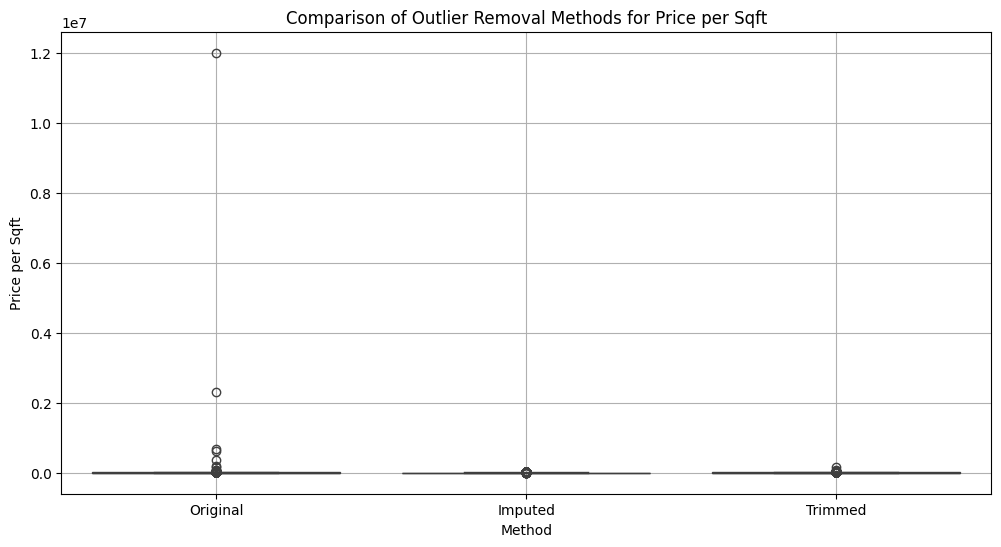

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# Create a new DataFrame for plotting
boxplot_data = pd.DataFrame({
    'Original': df['price_per_sqft'],
    'Imputed': df['price_per_sqft_imputed'],
    'Trimmed': df_trimmed_total_sqft['price_per_sqft']  # From the trimmed dataset
})

# Melt the DataFrame for seaborn
boxplot_data_melted = boxplot_data.melt(var_name='Method', value_name='Price per Sqft')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Price per Sqft', data=boxplot_data_melted)
plt.title('Comparison of Outlier Removal Methods for Price per Sqft')
plt.xlabel('Method')
plt.ylabel('Price per Sqft')
plt.grid(True)
plt.show()

In [21]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 3.6 MB/s eta 0:00:13
   ---------------------------------------- 0.3/44.5 MB 4.0 MB/s eta 0:00:12
   ---------------------------------------- 0.5/44.5 MB 4.0 MB/s eta 0:00:11
    --------------------------------------- 0.6/44.5 MB 3.7 MB/s eta 0:00:12
    --------------------------------------- 0.8/44.5 MB 3.8 MB/s eta 0:00:12
    --------------------------------------- 1.0/44.5 MB 3.7 MB/s eta 0:00:12
   - -------------------------------------- 1.3/44.5 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 1.5/44.5 MB 4.2 MB/s eta 0:00:11
  


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from scipy import stats

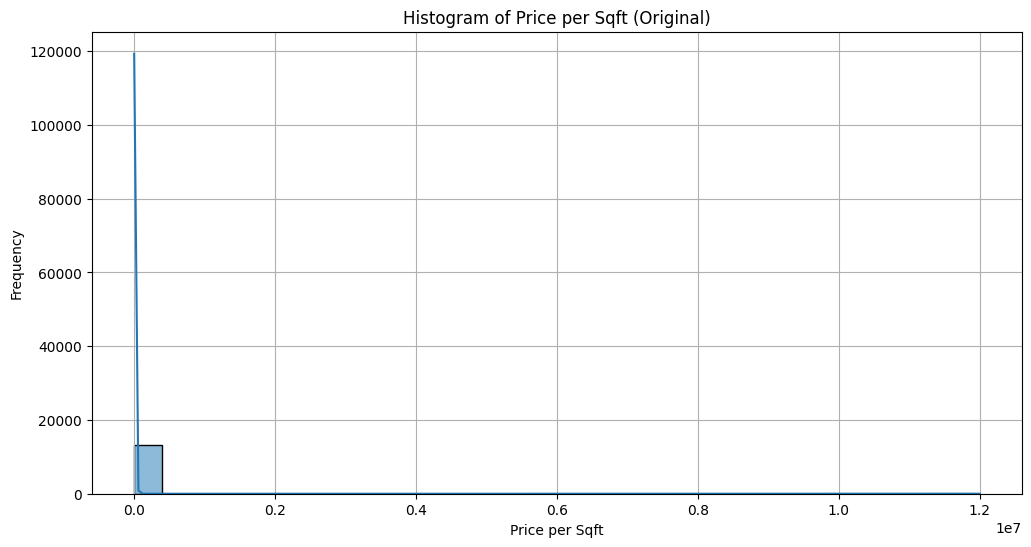

Original Skewness: 108.28105529705168
Original Kurtosis: 12095.21502832288


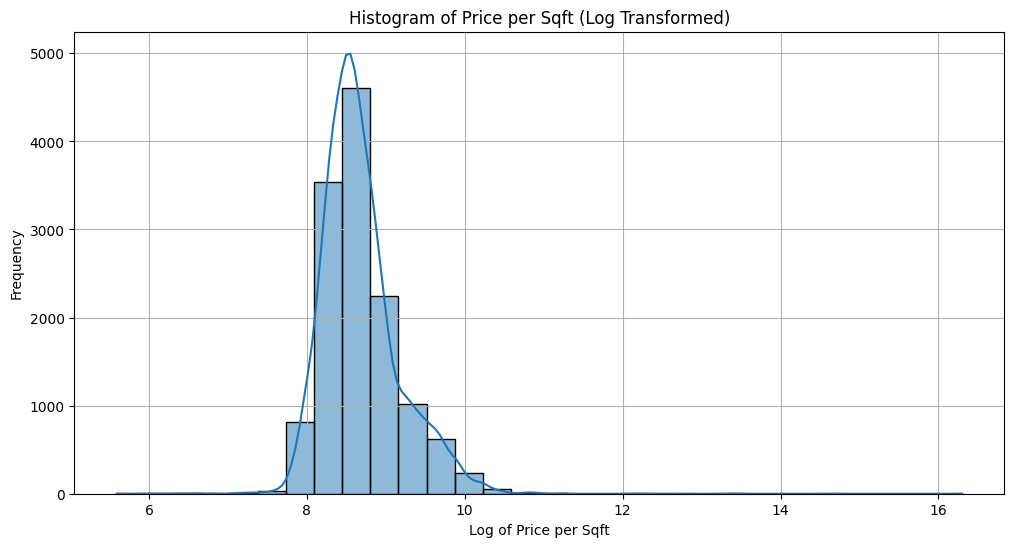

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Histogram of Price per Sqft (Original)')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 2: Calculate skewness and kurtosis
original_skewness = df['price_per_sqft'].skew()
original_kurtosis = df['price_per_sqft'].kurtosis()

print(f'Original Skewness: {original_skewness}')
print(f'Original Kurtosis: {original_kurtosis}')

# Step 3: Perform log transformation if skewness is significant
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Step 4: Plot the histogram of the transformed price_per_sqft
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft_log'], bins=30, kde=True)
plt.title('Histogram of Price per Sqft (Log Transformed)')
plt.xlabel('Log of Price per Sqft')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Calculate skewness and kurtosis after transformation
transformed_skewness = df['price_per_sqft_log'].skew()
transformed_kurtosis = df['price_per_sqft_log'].kurtosis()


location                   object
size                       object
total_sqft                float64
bath                      float64
price                     float64
bhk                         int64
price_per_sqft              int64
z_score                   float64
price_imputed_mean        float64
price_per_sqft_imputed      int64
price_per_sqft_log        float64
dtype: object
Non-numeric columns:
Index(['location', 'size'], dtype='object')


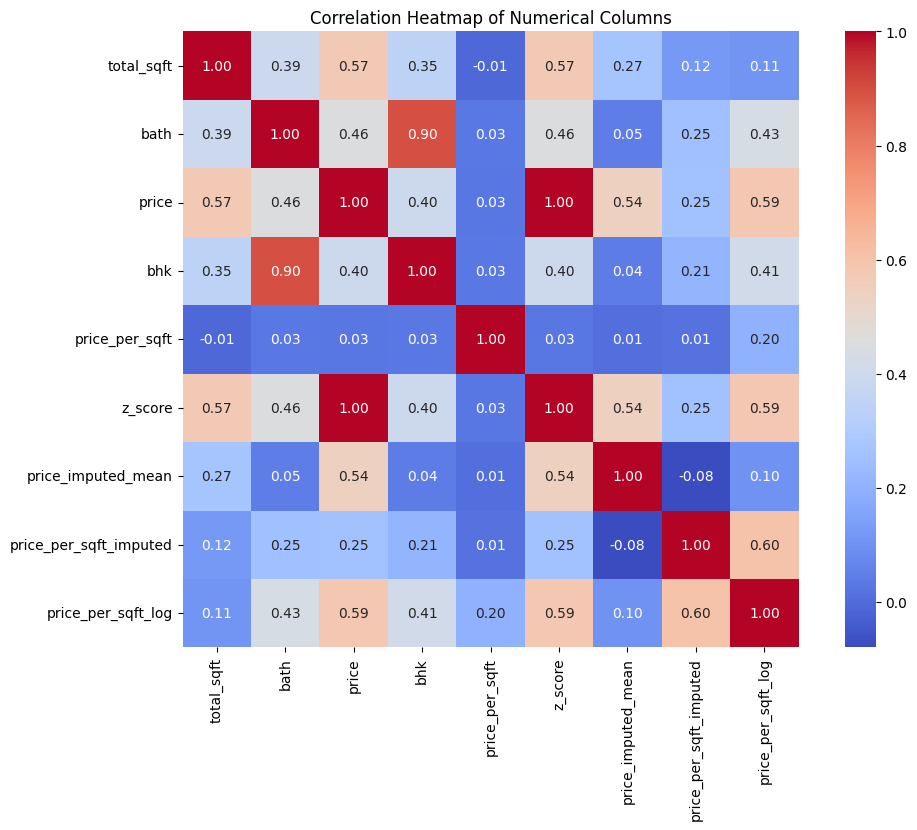

In [24]:
# Step 1: Check data types of the DataFrame
print(df.dtypes)

# Step 2: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:")
print(non_numeric_columns)

# Step 3: If needed, convert specific columns to numeric (if applicable)
# For example, if a column should be numeric but is being read as string
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# Step 4: Drop non-numeric columns before calculating correlation
df_numeric = df.select_dtypes(include=[np.number])

# Step 5: Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 6: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

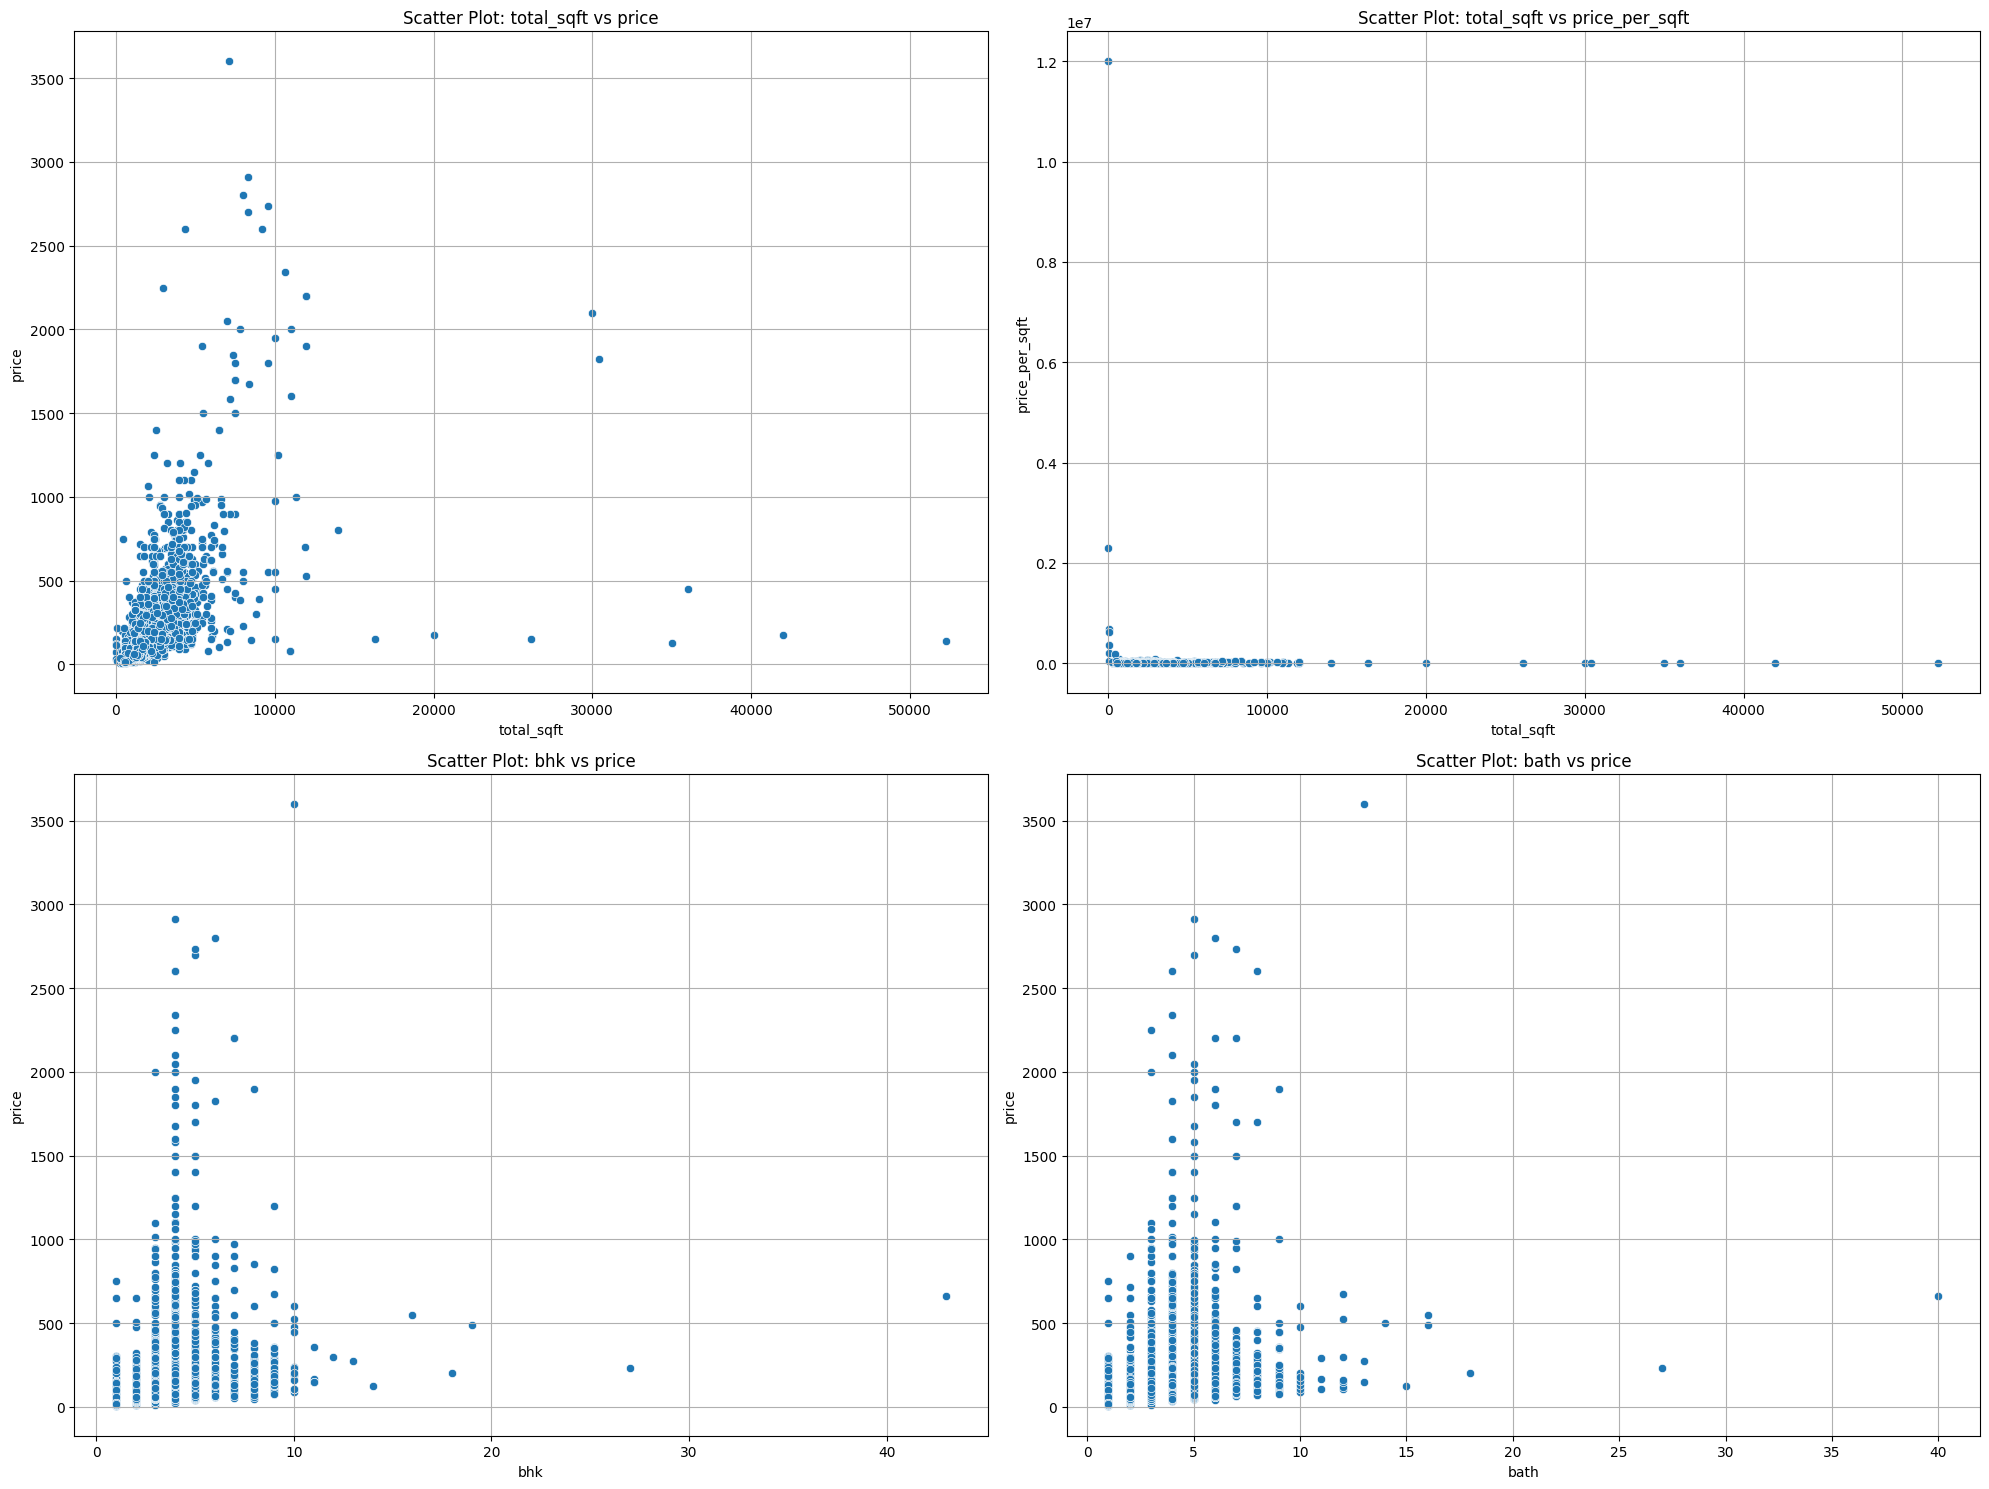

In [25]:
pairs = [('total_sqft', 'price'), ('total_sqft', 'price_per_sqft'), ('bhk', 'price'), ('bath', 'price')]

# Step 2: Create scatter plots for each pair
plt.figure(figsize=(20, 15))

for i, (x_var, y_var) in enumerate(pairs):
    plt.subplot(2, 2, i + 1)  # Adjust subplot grid as needed
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f'Scatter Plot: {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)

plt.tight_layout()
plt.show()